In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('joint_probs.csv', skipinitialspace=True)

In [3]:
df

,n,log_perplexity_baseline,log_perplexity_unroll8,log_perplexity_avx,log_perplexity_avx_acc4,log_perplexity_avx_fma_acc4,joint_probs_baseline,joint_probs_unroll8,joint_probs_avx_fma_acc4
0,2,125.674,139.292,100.233,156.187,161.478,4.243670e+04,3.497420e+04,3.676680e+04
1,3,210.525,215.193,118.008,253.869,258.989,1.651140e+05,1.106780e+05,1.110340e+05
2,4,395.532,400.480,176.831,181.120,177.560,6.640890e+05,3.948390e+05,1.822050e+05
3,5,805.820,764.007,296.728,268.559,272.366,2.972620e+06,1.763190e+06,6.061700e+05
4,6,1688.900,1494.610,468.283,449.421,441.849,1.210540e+07,6.710750e+06,1.982650e+06
5,7,3544.490,2983.260,835.824,796.542,788.697,4.938640e+07,2.628010e+07,7.092390e+06
6,8,7005.150,5885.410,1580.640,1505.830,1490.410,1.989640e+08,1.034950e+08,2.678430e+07
7,9,14393.000,11758.500,3058.470,2924.090,2905.730,8.038800e+08,4.125610e+08,1.064240e+08
8,10,29004.500,23578.400,6096.650,5771.750,5735.420,3.305350e+09,1.701630e+09,4.356390e+08
9,11,58258.600,47113.300,12173.800,11531.100,11421.800,1.417870e+10,6.959050e+09,1.758690e+09


In [36]:
def get_perf_joint_probs_baseline(func_name):
    perf_df = df[['n', func_name]]
    N = 2 ** df['n']
    perf_df['flop'] = 2329 * N * N - 805 * N
    perf_df['perf'] = perf_df['flop'] / perf_df[func_name]
    perf_df['mem'] = 8*N*N*(3*50+5)
    perf_df['I'] = perf_df['flop'] / perf_df['mem']
    return perf_df
def get_perf_joint_probs(func_name):
    perf_df = df[['n', func_name]]
    N = 2 ** df['n']
    perf_df['flop'] = (1938.5 * N * N + 1153.5 * N)
    perf_df['perf'] = perf_df['flop'] / perf_df[func_name]
    perf_df['mem'] = 8*N*N*(3*50+5)
    perf_df['I'] = perf_df['flop'] / perf_df['mem']
    return perf_df

In [37]:
v1 = get_perf_joint_probs_baseline('joint_probs_baseline')
v2 = get_perf_joint_probs('joint_probs_unroll8')
v3 = get_perf_joint_probs('joint_probs_avx_fma_acc4')

<ipython-input-36-effad2437963>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['flop'] = 2329 * N * N - 805 * N
<ipython-input-36-effad2437963>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['perf'] = perf_df['flop'] / perf_df[func_name]
<ipython-input-36-effad2437963>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Text(0, 0.5, 'Performance [F/C]')

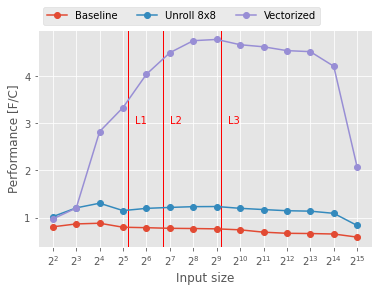

In [48]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.axvline(x=5.2, linewidth=1, color='r')
ax.text(5.5, 3, 'L1', color='r')
ax.axvline(x=6.7, linewidth=1, color='r')
ax.text(7, 3, 'L2', color='r')
ax.axvline(x=9.2, linewidth=1, color='r')
ax.text(9.5, 3, 'L3', color='r')

ax.plot(v1['n'], v1['perf'], '-o', label='Baseline')
ax.plot(v2['n'], v2['perf'], '-o', label='Unroll 8x8')
ax.plot(v3['n'], v3['perf'], '-o', label='Vectorized')


ticks_label = [r"$2^{{{}}}$".format(x) for x in v1['n']]
ax.set_xticks(v1['n'])
ax.set_xticklabels(ticks_label)
# ax.set_ylim(top=2.95)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", ncol=4)

ax.set_xlabel('Input size')
ax.set_ylabel('Performance [F/C]')

In [41]:
fig.savefig('joint_probs.png', bbox_inches='tight')

In [34]:
v1

,n,joint_probs_baseline,flop,perf,mem,I
0,2,4.243670e+04,34044,0.802230,8.053064e-01,42274.594307
1,3,1.651140e+05,142616,0.863743,3.221225e+00,44273.833434
2,4,6.640890e+05,583344,0.878412,1.288490e+01,45273.452997
3,5,2.972620e+06,2359136,0.793622,5.153961e+01,45773.262779
4,6,1.210540e+07,9488064,0.783788,2.061584e+02,46023.167670
5,7,4.938640e+07,38055296,0.770562,8.246337e+02,46148.120115
6,8,1.989640e+08,152427264,0.766105,3.298535e+03,46210.596338
7,9,8.038800e+08,610121216,0.758971,1.319414e+04,46241.834449
8,10,3.305350e+09,2441309184,0.738593,5.277656e+04,46257.453505
9,11,1.417870e+10,9766885376,0.688842,2.111062e+05,46265.263033


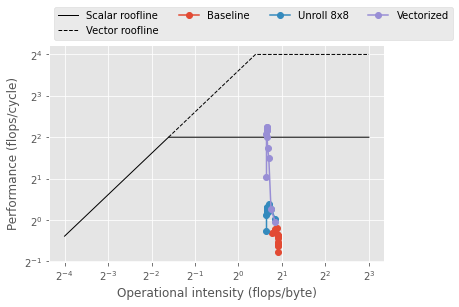

In [38]:
fig, ax = plt.subplots()
beta = 12.2 #bytes/cycle
ax.plot([1/16, 4/beta, 8], [beta/16, 4, 4], color='k', lw=1, label='Scalar roofline')
ax.plot([4/beta, 16/beta, 8], [4, 16, 16], color='k', lw=1, linestyle='--', label='Vector roofline')
ax.plot(v1['I'], v1['perf'], '-o', label='Baseline')
ax.plot(v2['I'], v2['perf'], '-o', label='Unroll 8x8')
ax.plot(v3['I'], v3['perf'], '-o', label='Vectorized')
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('Performance (flops/cycle)')
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", ncol=4)

In [5]:
def get_perf_log_perplexity(func_name):
    perf_df = df[['n', func_name]]
    N = 2 ** df['n']
    perf_df['perf'] = (23 * N + 5) / df[func_name]
    return perf_df

In [6]:
v1 = get_perf_log_perplexity('log_perplexity_baseline')
v2 = get_perf_log_perplexity('log_perplexity_unroll8')
v3 = get_perf_log_perplexity('log_perplexity_avx_acc4')
v4 = get_perf_log_perplexity('log_perplexity_avx_fma_acc4')

<ipython-input-5-e6d057112d89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['perf'] = (23 * N + 5) / df[func_name]


Text(0, 0.5, 'Performance [F/C]')

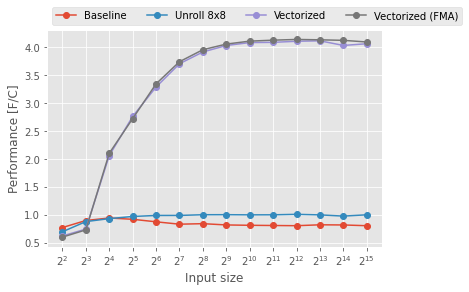

In [7]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

# ax.axvline(x=11, linewidth=1, color='r')
# ax.text(11.5, 1.65, 'L1', color='r')

ax.plot(v1['n'], v1['perf'], '-o', label='Baseline')
ax.plot(v2['n'], v2['perf'], '-o', label='Unroll 8x8')
ax.plot(v3['n'], v3['perf'], '-o', label='Vectorized')
ax.plot(v4['n'], v4['perf'], '-o', label='Vectorized (FMA)')


ticks_label = [r"$2^{{{}}}$".format(x) for x in v1['n']]
ax.set_xticks(v1['n'])
ax.set_xticklabels(ticks_label)
# ax.set_ylim(top=2.95)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", ncol=4)

ax.set_xlabel('Input size')
ax.set_ylabel('Performance [F/C]')

In [8]:
fig.savefig('log_perplexity.png', bbox_inches='tight')